# Assignment A1 [35 marks]

Please **read the instructions in `README.md`** before starting!

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import task1, task2, task3

## Task 1: Triquadrigons [14 marks]

_All function definitions for this task must be written in `task1.py`._

### Squares and triangles

You almost certainly know about ***square numbers***, with the $n$th square is defined as,

$$
S(n) = n^{2}.
$$

Of course, the numbers are called "squares" because $S(n)$ is the number of marbles in an $n \times n$ square array of marbles.

Another common set of integers with interesting properties are the  ***triangle numbers***, with the $n$th number defined as,

$$
T(n) = \frac{n\, (n+1)}{2}.
$$

Despite the overall factor of $1/2$, these numbers are integers because either $n$ or $n+1$ will inevitably be even. The numbers are called "triangular" because they give the number of marbles in an equilateral triangle with $n$ marbles on each side. The first few examples (starting with $n=0$) are 

$$
 \begin{array}{ccccccccccccccccc}
 n    & : & 0 & 1 & 2 & 3 &  4 &  5 &  6 &  7 &  8 &  9 & 10 & 11 & 12 & 13 &  14 & \ldots \\
 \hline
 T(n) & : & 0 & 1 & 3 & 6 & 10 & 15 & 21 & 28 & 36 & 45 & 55 & 66 & 78 & 91 & 105 & \ldots \\
\end{array}
$$

---
#### 🚩 1.a [1 mark]

Write a function `square(n)` and a function `triangle(n)` which, given an `int` input argument `n`, returns an `int` with the value of $S(n)$ and $T(n)$, respectively.

In [2]:
# Run this cell to test your functions.
importlib.reload(task1);
# Check some examples
assert task1.square(5) == 25
assert task1.triangle(4) == 10
# Check the output type
assert isinstance(task1.square(2), int)
assert isinstance(task1.triangle(6), int)
print('All tests passed.')

All tests passed.


---
### Looking for patterns: *"You can observe a lot by just watching."*

You might notice a few interesting relationships between $S(n)$ and $T(n)$, e.g., $S(n) = T(n) + T(n-1)$, "reflecting" a basic geometric fact about how to pack two triangles into a square. There are many, many more fascinating examples. We will explore a less-appreciated pattern of squares and triangles in this set of tasks. In particular,

***<p style="text-align: center;">Some triangles are also squares!</p>***

That means that there are some values of $m$ and $n$ where $S(m) = T(n)$, where typically $n > m$. First, notice the two trivial edge cases, 

$$
T(0) = S(0) = 0, \qquad T(1) = S(1) = 1.
$$

However, also notice that 

$$
S(6) = T(8) = 36.
$$

How many more solutions are there? That is, we want to solve 

$$
S(m) = T(n),
$$

where $m \ne n$ (except $0$ and $1$). Given the first non-trivial example $(m,n) = (6,8)$, how might we find more? 

###  Recursion: *"Déjà vu all over again"*

It happens that if you know a given solution $(m_k, n_k)$ which satisfies
$
S(m_{k}) = T(n_{k}),
$
there is a simple recursion that finds the next solution $(m_{k+1}, n_{k+1})$ which satisfies $S(m_{k+1}) = T(n_{k+1})$. It takes the general form,

$$
\left[
\begin{array}{c}
 m_{k+1} \\
 n_{k+1} \\
\end{array}
\right] \ = \ \left[
\begin{array}{cc}
 a & b \\
 c & d \\
\end{array}
\right]\cdot \left[
\begin{array}{c}
 m_{k} \\
 n_{k} \\
\end{array}
\right] + \left[
\begin{array}{c}
 e \\
 f \\
\end{array}
\right],
$$

where $a,b,c,d,e,f$ are integer parameters. Here, our goal is to **determine $a,b,c,d,e,f$**.

First, notice that we need to get from $(m_{0},n_{0}) = (0,0)$ to $(m_{1},n_{1}) = (1,1)$. We can't do this by multiplying $(0,0)$ by anything. We, therefore, need $(e,f) = (1,1)$ to get off the ground. The recursion is now,

$$
\left[
\begin{array}{c}
 m_{k+1} \\
 n_{k+1} \\
\end{array}
\right] \ = \ \left[
\begin{array}{cc}
 a & b \\
 c & d \\
\end{array}
\right]\cdot \left[
\begin{array}{c}
 m_{k} \\
 n_{k} \\
\end{array}
\right] + \left[
\begin{array}{c}
 1 \\
 1 \\
\end{array}
\right].
$$

What else can we say? We know that the recursion goes from $(m_{1},n_{1}) = (1,1)$ to $(m_{2},n_{2}) = (6,8)$. Written out explicitly, 

$$
6 \ = \ a + b + 1,
$$
$$
8 \ = \ c + d + 1.
$$

While this represents progress, we don't have enough information yet to solve for $a,b,c,d$. But we *would* have enough to pin down the solution if we knew one more pair $(m_{3},n_{3})$. In that case, you would have the additional two equations 

$$
m_{3} \ = \ 6\,a + 8\, b + 1,
$$
$$
n_{3} \ = \ 6\,c + 8\, d + 1.
$$

There are a few ways you can figure out what you need. But the simplest way is to find $(m_{3},n_{3})$ with a computational search.  

#### Moral of the story: *"It is difficult to make predictions, especially about the future."*

Something interesting is going on here. First, we can use a brute-force method to obtain some numerical data. This effort can be genuinely brute-force such that we pay little attention to efficiency. After all, we are only interested in finding two numbers, which (hopefully) aren't very large. Once we find $(m_{3},n_{3})$, we can solve our analytical system and obtain an efficient algorithm for general $(m_{k},n_{k})$.

However, we can never be sure how big the numbers $(m_{3},n_{3})$ are ahead of time. Therefore, with caution in mind, we can use some of the mathematical structure of the problem to make the direct search more efficient. Doing so will allow obtaining more data to validate our analytical formula against later.

Hopefully, the overall purpose is clear: We can leverage numerical computation to discover and validate exact analytical mathematics. This example is relatively simple, but there are many more important examples throughout all different fields of mathematics and computation.

Let's start with trying different approaches to obtain $(m_{3},n_{3})$ in a reasonable time (and hopefully, the next few pairs too).

---
#### 🚩 1.b [3 marks]

Write a function called `brute_force_search(m_max)` that takes a single `int` parameter, `m_max`, and returns a list of lists containing ***all*** solution pairs `[m, n]` where $m \le m_{\max}$. The `m` and `n` values in your list of lists should be `int`s.

- ***Make sure*** to call your helper functions `square()` and `triangle()` from **1.a**.
- You might notice that $S(m) = T(n)$ means that $2m^{2} = n^{2} + n$, which in turn implies 
    $$
    m \le n \le \sqrt{2} \, m,
    $$ 
    giving a range that you can restrict your search to.

In [3]:
importlib.reload(task1);
assert task1.brute_force_search(6) == [[0, 0], [1, 1], [6, 8]]
assert task1.brute_force_search(5) == [[0, 0], [1, 1]]
assert task1.brute_force_search(10) == [[0, 0], [1, 1], [6, 8]]
assert task1.brute_force_search(0) == [[0, 0]]
print('All tests passed.')

All tests passed.


---
### Reduce the search

While the brute-force approach can quickly give us what we want, it doesn't scale well for large `m_max`. The problem is that we are searching over *both* `m` and `n` possibilities. However, we know that some combinations are unlikely or impossible. We would have an *exact* relation between $n$ and $m$ if we were interested in non-integer solutions. Using the quadratic formula and requiring $n\ge 0$, 

$$
S(m) = T(n) \qquad \iff \qquad n = \frac{\sqrt{1 + 8 m^{2}} - 1}{2}.
$$

The problem is that we don't know which integer values of $m$ give integer values of $n$. But we now have a computationally faster algorithm.

---
#### 🚩 1.c [3 marks]

Write a pair of helper functions called `floor_root(n)` and `is_square(n)` that will help you determine whether or not an integer is a perfect square. 

First, the `floor_root()` function takes an `int` argument, $n$, and returns an integer $r$ which is the square root of $n$ rounded *down* to the nearest integer, that is $r \ = \ \text{floor}(\sqrt{n})$.

- If $n$ *happens to be* a perfect square, then numerically taking the square-root function might produce a number that is just slightly smaller than the exact answer (to within roundoff error). In such a case, rounding down would give the incorrect answer. It's possible to safeguard against this type of error by noticing that $r \ = \ \text{floor}(\sqrt{n+1/2})$ gives the correct answer in all cases.
- You should also *vectorise* your `floor_root()` function. This means that if you input a NumPy array with integer values, the function should apply to each entry individually, and return a NumPy array of the same size containing the results.
- For full marks, you must operate on entire NumPy arrays, and not loop or iterate over individual values. (Note that `np.vectorize()` still uses iteration in the background, and is therefore not suitable.)


Next, you should write a function `is_square()` that takes an `int` argument, $n$ and returns `True` if $n$ is a perfect square and `False` otherwise.

- Like the `floor_root()` function, the `is_square()` function should also be *vectorised*.
- You should use your `floor_root()` inside your `is_square()` function.

In [4]:
importlib.reload(task1);

# Test with integer inputs
assert task1.floor_root(99) == 9
assert task1.floor_root(100) == 10

# Check if result is an integer
assert isinstance(task1.floor_root(26), (int, np.int32, np.int64))

# Test with arrays
n_values = np.array([0, 1, 2, 3, 4, 5, 6, 8, 9, 10])
expected = np.array([0, 1, 1, 1, 2, 2, 2, 2, 3, 3])
np.testing.assert_equal(task1.floor_root(n_values), expected)

print('All tests passed.')

All tests passed.


In [5]:
importlib.reload(task1);

# Test with integer inputs
assert not task1.is_square(99)
assert task1.is_square(100)

# Test with arrays
n_values = np.array([0, 1, 2, 3, 4, 5, 6, 8, 9, 10])
expected = np.array([True, True, False, False, True, False, False, False, True, False])
np.testing.assert_equal(task1.is_square(n_values), expected)

print('All tests passed.')

All tests passed.


---
#### 🚩 1.d [3 marks]

Write a function called `triangle_search()` that takes a single `int` input argument, `m_max`, and returns exactly the same formatted results as `brute_force_search()`.

The difference this time is that your function should **not** loop over all candidate $(m,n)$ pairs. Instead, your function should determine the values of $m$ where $1+8m^{2}$ is a perfect square, and produce $n$ directly as a result. 

* Your function should use your `floor_root()` and `is_square()` internally.
* For full marks, your function should operate in a vectorised way, on entire NumPy arrays, and not use iteration. In particular, you can make use of Boolean indexing to extract elements of an array which satisfy some condition.

The `triangle_search()` function should be much more efficient that the `brute_force_search()` function. You will be able to check much larger input `m_max` values. However, you should still only expect to find approximately a dozen $(m,n)$ solution pairs within a reasonable computation time. 

In [6]:
importlib.reload(task1);
assert task1.triangle_search(6) == [[0, 0], [1, 1], [6, 8]]
assert task1.triangle_search(5) == [[0, 0], [1, 1]]
assert task1.triangle_search(10) == [[0, 0], [1, 1], [6, 8]]
assert task1.triangle_search(0) == [[0, 0]]
assert task1.triangle_search(10000) == [[0, 0], [1, 1], [6, 8], [35, 49], [204, 288], [1189, 1681], [6930, 9800]]
print('All tests passed.')

All tests passed.


---
Now that we've found $(m_3, n_3)$ with a computational search, we should have enough information to determine $a,b,c,d$. We can use the recursion formula from before to write

$$
\left[
\begin{array}{c}
 m_3 - 1 \\
 n_3 - 1 \\
\end{array}
\right] \ = \ \left[
\begin{array}{cc}
 a & b \\
 c & d \\
\end{array}
\right]\cdot \left[
\begin{array}{c}
 m_2 \\
 n_2 \\
\end{array}
\right],
$$

$$
\left[
\begin{array}{c}
 m_2 - 1 \\
 n_2 - 1 \\
\end{array}
\right] \ = \ \left[
\begin{array}{cc}
 a & b \\
 c & d \\
\end{array}
\right]\cdot \left[
\begin{array}{c}
 m_1 \\
 n_1 \\
\end{array}
\right].
$$

We can combine the two equations as

$$
\left[
\begin{array}{cc}
 m_3 - 1 & m_2 - 1\\
 n_3 - 1 & n_2 - 1\\
\end{array}
\right] \ = \ \left[
\begin{array}{cc}
 a & b \\
 c & d \\
\end{array}
\right]\cdot \left[
\begin{array}{cc}
 m_2 & m_1 \\
 n_2 & n_1 \\
\end{array}
\right].
$$

Here, the unknowns are $a,b,c,d$. This is therefore a system of the form $B = XA$, where $B$ and $A$ are known $2\times 2$ matrices, and $X$ is an unknown $2\times 2$ matrix.

Note that this is slightly different from linear systems of the form $Ax = b$ that we have seen (and solved) in the course; however, with a little bit of algebraic work, it is possible to rearrange it to take that form.

---
#### 🚩 1.e [2 marks]

Write a function `matrix_solve(A, B)` which takes 2 input arguments `A` and `B`, both NumPy arrays representing matrices of size $n \times n$. Your function should solve the system $XA = Y$ for $X$, given known $A$ and $Y$, and return the solution $X$ as a NumPy array of size $n\times n$.

You can use e.g. `np.linalg.solve()` in your function, but you will need to rearrange the system into a suitable form first.

Then, write code in the cell below which uses your function to calculate the values of $a,b,c,d$ using the values of $(m_1, n_1), (m_2, n_2), (m_3, n_3)$ obtained by computational search in the earlier questions. Running the code cell must display the results in a clear and understandable manner.

In [7]:
importlib.reload(task1);

# Test with arbitrary values
A = np.array([[5, 7, 9], [8, 10, 1], [4, 6, 5]])
B = np.array([[4, 2, 5], [8, 6, 2], [7, 10, 5]])
X = task1.matrix_solve(A, B)

assert X.shape == (3, 3)              # checks that X is a NumPy array of the correct shape
np.testing.assert_allclose(X@A, B)    # tests that XA = B, meaning that X is indeed the solution

In [8]:
importlib.reload(task1);

# Array matrixes using values from our search
A = np.array(([6, 1], [8, 1]))
B = np.array(([34, 5], [48, 7]))

# Solve for a,b,c,d
sol = task1.matrix_solve(A, B)

[1, 1], [6, 8], [35, 49]

print(f'The integer parameters for the general matrix form of S(m) = T(n) are: \na: {(sol[0, 0]):.0f}, b: {sol[0, 1]:.0f}, c: {sol[1, 0]:.0f} d: {sol[1, 1]:.0f}')


The integer parameters for the general matrix form of S(m) = T(n) are: 
a: 3, b: 2, c: 4 d: 3


---
#### 🚩 1.f [2 marks]

Write a function `triquadrigon(k)` which takes a single `int` parameter, `k`, and returns 2 output `int` values, representing the $k$th pair of integers $m_{k}, n_{k}$ such that $S(m_k) = T(n_k)$.

Your function should make use of the recursion formula, with the (hard-coded) values you found in **1.e** for $a, b, c, d$. These should be simple, modest-sized integers. You should implement your function to use `int` operations everywhere, so that it can compute and return very large numbers. (In particular, don't use NumPy arrays!)

If you don't have the correct values for $a, b, c, d$ from the previous questions, then use the *alternative values* $(a,b,c,d) = (1,1,1,0)$. If your function is correct except for the values of $a, b, c, d$, then the tests below will still pass as long as you use those alternative values.

In this task, you should be able to *easily* compute values up to $k=100$ and even $k=1000$ instantaneously. For context (assuming the correct parameter values), $k=1000$ gives a pair of 765-digit numbers. Also in this case you should easily be able to confirm $S(m_{k}) = T(n_{k})$. 

In [20]:
importlib.reload(task1);

mk, nk = task1.triquadrigon(100)

try:
    # This should work for the correct values of a, b, c, d
    assert task1.square(mk) == task1.triangle(nk)
    print('Test passed with correct values of a, b, c, d.')
except AssertionError:
    # This should work with the alternative values of a, b, c, d
    assert (mk, nk) == (1500520536206896083275, 927372692193078999175)
    print('Test passed with alternative values of a, b, c, d.')

Test passed with correct values of a, b, c, d.


---
## Task 2: Estimating snow fall [14 marks]

_All function definitions for this task should be written in `task2.py`._

In the course, we have seen how composite quadrature can be used to approximate integrals of functions, to some desired accuracy, by evaluating the function at a finite number of points and estimating the integral as a weighted sum of those evaluations.

This can be a useful tool to apply to a range of real-life situations, in particular when you may not have access to an analytical expression for the function you want to integrate -- but you can still evaluate it at chosen points. However, in many such situations, evaluating the function at many points can be expensive. Here is one such scenario.

- You have been tasked by the Met Office to estimate the **total amount of snow** (in cubic metres) which has fallen on a hill chain in the Highlands.
- To simplify the problem, you will only look at a **1-metre wide strip** along a "cross-section" of the hill chain. We assume that the snow depth is constant across the 1-metre width of the strip.
- You can send a ranger to walk all the way along that strip, and take **measurements of the snow depth at regular intervals**.
- Each measurement takes time and effort; therefore, you are trying to produce as accurate an estimate as possible, with as few snow depth measurements as possible.

---

A hill range of length $L$ (in metres) can be represented as a collection of $M$ overlapping individual hills, the height of which can be represented with Gaussian functions. The altitude (or relief) $r(x)$ of the hills at a location $x \in [0, L]$ can therefore be expressed as

$$
r(x) = \sum_{i=0}^{M} \frac{H_i}{\sigma_i\sqrt{2\pi}} e^{-\frac{(x-\mu_i)^2}{2\sigma_i^2}},
$$

where $H_i$ is a positive number which scales the altitude of hill $i$ (in metres), $\sigma_i$ represents the breadth of hill $i$, and $\mu_i$ the location of its peak.

Conveniently, this expression has an integral which can be evaluated exactly --- for example, if we wanted to calculate the total volume of rock (in cubic metres, along a 1-metre wide strip, as explained above) between two arbitrary points $a, b \in [0, L]$,

$$
\int_a^b r(x) dx = \sum_{i=0}^{M} \frac{H_i}{2}  \left( \mathrm{erf}\left(\frac{b - \mu_i}{\sigma_i \sqrt{2}}\right) - \mathrm{erf}\left(\frac{a - \mu_i}{\sigma_i\sqrt{2}}\right)\right),
$$

where $\mathrm{erf}(x)$ is the [_error function_](https://mathworld.wolfram.com/Erf.html). In Python, `scipy.special` includes the `erf()` function:

```python
from scipy.special import erf
erf(2)
```

We denote by $d(x)$ the **depth of snow** on the hill chain at a location $x$, and by $S(x) = d(x) + r(x)$ the **overall altitude** of the surface of the snow at $x$. The total volume of snow on the hill chain is therefore

$$
V_{\text{exact}} = \int_0^L S(x) dx - \int_0^L r(x) dx.
$$

We don't have an analytical expression for $d(x)$, but we can evaluate it at a given number of points by taking snow depth measurements. Since we can evaluate and integrate $r(x)$ exactly, we can approximate $V_{\text{exact}}$ by using quadrature to approximate the integral of $S(x)$ using regularly spaced snow depth measurements.

---

#### 🚩 2.a [3 marks]

Write a function `create_hills(x, params)` which takes two input arguments:

- `x`, a NumPy vector containing $N$ points in the interval $[0, L]$ over which to evaluate $r(x)$,
- `params`, a NumPy array with 3 rows and $M$ columns, containing the values of the $H_i$, $\mu_i$, and $\sigma_i$ parameters in its first, second, and third row respectively,

and returns `r`, a NumPy vector of length $N$, containing the values of $r(x)$ for each value of $x$ given in the input vector `x`.

Then, write a function `plot_hills(x, r, snow_depth=None)` which takes three input arguments:

- `x`, a NumPy vector containing $N$ points in the interval $[0, L]$,
- `r`, a NumPy vector of length $N$ as that returned by `create_hills(x, H, mu, sig)`,
- `snow_depth`, either the value `None` or a NumPy vector of length $N$ containing measurements of the snow depth $d(x)$ taken at every point in `x`,

and creates a plot of the altitude of the hill chain generated with `create_hills()`, and also optionally displays the surface of the snow using the `snow_depth` measurements if they are given. If `snow_depth` is `None` (its default value), then your function should only display the hill relief.

To summarise:

- `plot_hills(x, r)` should only display the shape of the hill chain.
- `plot_hills(x, r, snow_depth)` should display the hill chain, and also the snow on top. You can choose how you want to represent this on your figure, but it should be clear and self-explanatory.

Some starter code is given for this, similar to many plotting examples found in the course materials; your function should return the `fig` and `ax` objects created by `plt.subplots()`, containing your plot of the hill chain.

Your plot should be laid out and labelled clearly, and represent the hill chain as a single line, not individual hills.

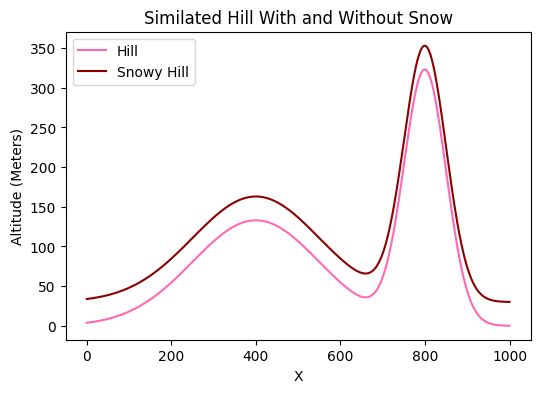

In [10]:
# A simple test: this should display a chain with 2 hills with altitude
# approx. 130 and 320 metres, and a uniform +30 metres of snow on top
importlib.reload(task2);
L, N = 1000, 2**12 + 1

H = [50000, 40000]
mu = [400, 800]
sig = [150, 50]
params = np.array([H, mu, sig])

x = np.linspace(0, L, N)
snow_depth = 30*np.ones(N)

r = task2.create_hills(x, params)
fig, ax = task2.plot_hills(x, r, snow_depth)
plt.show()

---
#### 🚩 2.b [3 marks]

Let $V(h)$ be an approximation of $V_{\text{exact}}$, obtained using a **composite** quadrature rule with equally-spaced subintervals of width $h$ to approximate $\int_0^L S(x) dx$.

Write a function `estimate_snowfall(snow_depth, params, L, method)` which takes four input arguments:

- `snow_depth`, a NumPy vector containing a set of measurements of snow depth $s(x)$, which are equally spaced over $[0, L]$ (and include both endpoints),
- `params`, a NumPy array with 3 rows and $M$ columns, containing the values of the $H_i$, $\mu_i$, and $\sigma_i$ parameters in its first, second, and third row respectively,
- `L`, a floating point number representing the total length of the hill range in metres,
- `method`, a string which can take the values `'riemann_left'` or `'trapezoid'`,

and returns $V(h)$, obtained using the composite quadrature rule indicated by `method`, using all available measurements in the `snow_depth` vector (except the last one for the `'riemann_left'` method).

*Hints:*

- The value of $h$ can be directly obtained from the function inputs.
- You may wish to write a helper function to calculate the exact integral of $r(x)$ over an arbitrary interval $[a, b]$, using the `erf()` function.

In [11]:
importlib.reload(task2);
# Load a test example
params = np.loadtxt('testing/params_2b.txt')
snow_depth = np.loadtxt('testing/snow_2b.txt')
L = 1000

snowfall_riem = task2.estimate_snowfall(snow_depth, params, L, 'riemann_left')
snowfall_trapz = task2.estimate_snowfall(snow_depth, params, L, 'trapezoid')

assert round(snowfall_riem, 2) == 9939.26
assert round(snowfall_trapz, 2) == 9926.47
print('Tests passed.')

Tests passed.


---

#### 🚩 2.c [2 marks]

We now have access to an estimate of the total snowfall, using every available measurement. We now want to investigate how much precision we would be losing by sending the mountain ranger to take fewer measurements next time.

Write a function `spaced_estimates(snow_depth, params, L)` which takes three input arguments:

- `snow_depth`, a NumPy vector containing a set of measurements of snow depth, which are equally spaced over $[0, L]$ (and include both endpoints),
- `params`, a NumPy array with 3 rows and $M$ columns, containing the values of the $H_i$, $\mu_i$, and $\sigma_i$ parameters in its first, second, and third row respectively,
- `L`, a floating point number representing the total length of the hill range in metres,

and uses both composite quadrature rules above to estimate the snow depth using only every $2^k$th measurement available, for $k = 0, 1, 2, \dots, 6$. For example, you should use every available measurement with $k=0$; you should use every fourth measurement with $k=2$; etc.

In other words, you should calculate $V(2^k h)$ with both methods, for $k = 0, 1, 2, \dots, 6$, where $h$ is the distance between two consecutive measurements in `snow_depth` (i.e. the smallest interval width you have available).

Your function should call `estimate_snowfall()` internally, and return a NumPy array with 2 rows and 7 columns, with the values of $V(2^k h)$ obtained using left Riemann sum in the first row, and the values of $V(2^k h)$ obtained using the trapezoid rule in the second row.

In [12]:
importlib.reload(task2);

# Using the same example values as in 2.b
params = np.loadtxt('testing/params_2b.txt')
snow_depth = np.loadtxt('testing/snow_2b.txt')
snowfall_2c = task2.spaced_estimates(snow_depth, params, L)
assert snowfall_2c.shape == (2, 7)

# Check the results for k=0 (run the test cell in 2.b before this)
assert snowfall_2c[0, 0] == snowfall_riem
assert snowfall_2c[1, 0] == snowfall_trapz

# Check the results for k=2
assert round(snowfall_2c[0, 2], 2) == 9977.59
assert round(snowfall_2c[1, 2], 2) == 9926.41

print('All tests passsed.')

All tests passsed.


---

#### 🚩 2.d [3 marks]

As we've seen in the course, the error $E(h) = V_{\text{exact}} - V(h)$ between the exact volume of snow, and its estimate obtained with a composite quadrature rule with interval width $h$, depends on $h$ and $r$, the rate of convergence of the quadrature rule. We have also seen methods to determine, numerically, the rate of convergence $r$ associated with a particular composite rule, by integrating a test function and computing the error between the exact integral and the approximation for different values of $h$.

Here, we don't have access to $V_{\text{exact}}$ --- so we can't calculate the error directly. However, it is still possible to determine $r$ numerically.

Using the output from your `spaced_estimates()` function above, and the example hill range and snow depth measurements provided below, provide numerical evidence, supported by an appropriate plot, to confirm that the rate of convergence for the left Riemann sum is 1, and that of the composite trapezoid rule is 2. You must show any preliminary working; you can use a Markdown cell to typeset it (using LaTeX for mathematical notation), or attach a handwritten PDF to your submission if you prefer.

The rate of convergence is deduced through the relationship: $E(h) = \text{constant} \times \text{width}^r$. My process began by finding the width (step size) values associated with each value of k because k where measurements were recorded. Then, I essentially approximated error as a function by calculating the difference between measurements as those scale with less available measurements i.e. larger k's. This is because we systemically introduced more error through the use of less measurements i.e. more apporximation and worse integration. This allowed tracking and visualization of error without ever obtaining an exact integral. I used log properties to make the exponential relationship linear, i.e, r became the slope of the line. I utilized both 2c and 2d measurements for more accuracy. I averaged them to get the slope i.e. r values for trapezoid and riemann left methods.

The r values estimated as the slope from a log-log plot of error and width are:
Riemann Left: 1 and Trapezoid: 2.


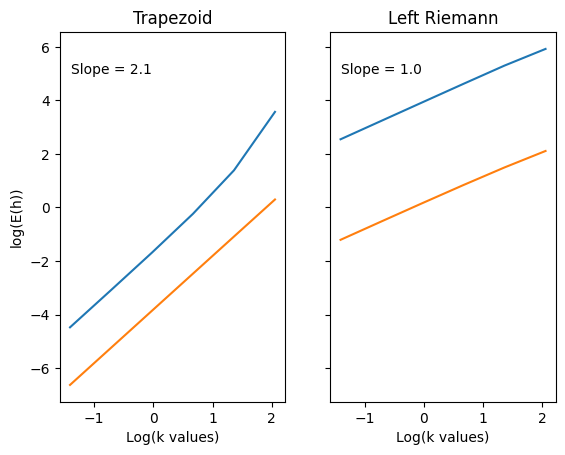

In [13]:
importlib.reload(task2);
params = np.loadtxt('testing/params_2d.txt')    # Hill range parameters
snow_depth = np.loadtxt('testing/snow_2d.txt')  # Snow depth measurements
L = 1000                                        # Total length of the hill range

# Find h (width) values for each value of k 0..6
h_k_vals = L / (len(snow_depth) - 1) * 2 ** np.arange(7)
snowfall_2d = task2.spaced_estimates(snow_depth, params, L)

# Use np.diff fn to calculate difference in error as moving to larger steps btwn measurements
error_trap_2c = np.abs(np.diff(snowfall_2c[1, :]))
error_trap_2d = np.abs(np.diff(snowfall_2d[1, :]))
error_riem_2c = np.abs(np.diff(snowfall_2c[0, :]))
error_riem_2d = np.abs(np.diff(snowfall_2d[0, :]))

# Plot two log plots: trapezoid and left riemann 
fig, ax = plt.subplots(1, 2, sharey = True)

# Since error i.e. np.diff needs two measurements, the last h_k_val has to be exluded to match the size
ax[0].plot(np.log(h_k_vals[:-1]), np.log(error_trap_2c))
ax[0].plot(np.log(h_k_vals[:-1]), np.log(error_trap_2d))
ax[1].plot(np.log(h_k_vals[:-1]), np.log(error_riem_2c))
ax[1].plot(np.log(h_k_vals[:-1]), np.log(error_riem_2d))
ax[0].set_xlabel("Log(k values)")
ax[0].set_title("Trapezoid")
ax[1].set_title("Left Riemann")
ax[1].set_xlabel("Log(k values)")
ax[0].set_ylabel("log(E(h))")

# Find the slopes of each line using polyfit fn
slope_trap_2c, _ = np.polyfit(np.log(h_k_vals[:-1]), np.log(error_trap_2c), 1)
slope_trap_2d, _ = np.polyfit(np.log(h_k_vals[:-1]), np.log(error_trap_2d), 1)
slope_riem_2c, _ = np.polyfit(np.log(h_k_vals[:-1]), np.log(error_riem_2c), 1)
slope_riem_2d, _ = np.polyfit(np.log(h_k_vals[:-1]), np.log(error_riem_2d), 1)

# Take the average of each slope to get an approximation of the r values
r_riemann_left = (slope_riem_2c + slope_riem_2d) / 2
r_trap = (slope_trap_2c + slope_trap_2d) / 2

# This displays the r values and provides evidence for the given rates of convergence
print(f"The r values estimated as the slope from a log-log plot of error and width are:\nRiemann Left: {round(r_riemann_left)} and Trapezoid: {round(r_trap)}.")
ax[0].text(-1.4, 5, f"Slope = {r_trap:.1f}")
ax[1].text(-1.4, 5, f"Slope = {r_riemann_left:.1f}")
plt.show()

---

#### 🚩 2.e [3 marks]

Snow falls on the hill range, and eventually settles. Mathematically, this can be modelled by a joint process of _addition_ and _diffusion_ of the hill relief. This is beyond the scope of this course -- but the key information, for this question, is the effect of these processes on the **curvature** (second derivative) of the relief: the curvature of the surface of the snow $S(x)$ will always be, in magnitude, smaller than or equal to the curvature of the mountain relief $r(x)$ below, at any point along the hill range. Intuitively, it means that the surface of the snow is always smoother than the surface of the mountain.

We have seen in the course (and in the previous question) that the composite **trapezoid rule** has rate of convergence 2. In other words, the error $E(h)$ is proportional to $h^2$. So far, we have not made use of the coefficient of proportionality (referred to as "a constant"); but in fact, it can be shown (see **ASC 3.3**, eq. (3.19)) that the error when integrating a function $f(x)$ over an interval $[a, b]$ is exactly

$$
E(h) = -\frac{(b-a)f''(\xi)}{12} h^2, \qquad \text{for some } \xi \in [a, b].
$$

With this information, and keeping in mind that $\xi$ is not known, it is possible to determine a lower bound for the total number of equally spaced measurements to take to obtain an estimate of $V(h)$ (using the composite trapezoid rule), for a given arbitrary hill chain $r(x)$ (defined with Gaussian functions as in the rest of the question), which is **guaranteed** to be within a given tolerance $\epsilon > 0$ of $V_{\text{exact}}$.

Write a function `min_points(params, L, eps)` which, given hill chain parameters `params`, total length `L`, and a tolerance `eps`, computes and returns this lower bound as an integer `Nmin`.

Use the Markdown cell below, or attach a PDF, to show and fully explain your working.

For checking: for the hill range from question **2.b**, you should find that using 900 equally-spaced points is sufficient to guarantee that $V(h)$ is within 1 cubic metre of $V_{\text{exact}}$. The actual lower bound is slightly smaller than this; full marks can only be achieved if you can compute it precisely (for any arbitrary hill chain).

In [14]:
importlib.reload(task2);
params = np.loadtxt('testing/params_2b.txt')
L = 1000
eps = 1.
Nmin = task2.min_points(params, L, eps)

print(f'To guarantee an error of less than {eps} cubic metres, we need at least Nmin = {Nmin} points.')

To guarantee an error of less than 1.0 cubic metres, we need at least Nmin = 883 points.


The curvature of the surface of the snow will always be less than or equal than the curvature of the relief. This fact can be used to create an upper bound on error, i.e., we can guarentee the estimated integral is within a certain range. Since the curvature of relief is equal to or higher, the error when using the trapezoid integration method will be equal to or higher. This is demonstrated in the trapezoid inegration equation given above. Since we want to bound error, the metric for the second derivative in the equation of error should be the highest second derivative of relief. Thus, my function builds upon this idea.

I chose a brute force method. I start with the lowest number of measurements. This must start at 3 because you cannot take the second derviative from any smaller sized set. The idea is that the lowest number of measurments will produce the highest error. This is because the integration requires more approximations. I create x-values as the number of measurements within the specified range. I plut those into an earlier function of r(x) to get the correpsonding y-values. Then, I find the largest second derivative using a limit method. Once I have the largest second derivaitive, then I can plug this into the error function. The number of points is increased until the error falls below the specified range. Thus, we have the minimum number of points needed to integrate using the trapezoid method that falls within a certain range of accuracy. 

---
## Task 3: The Euler-Mascheroni constant [7 marks]

_All function definitions for this task must be written in `task3.py`._

You undoubtedly know a few fundamental mathematical constants -- e.g. $\sqrt{2}$, $\pi$, $e$, $\phi$... However, there's a somewhat lesser-known mathematical constant that's nevertheless extremely important in numerous mathematical applications. 

The original definition of the *Euler-Mascheroni constant* or the *Euler*-$\gamma$ *constant* comes from considering the *Harmonic series*

$$
H_{n} \ = \ \sum_{k=1}^{n} \frac{1}{k} \ = \ 1 + \frac{1}{2} + \frac{1}{3} + \ldots + \frac{1}{n}.
$$

It's a classical result that the harmonic series diverges $\lim_{n\to \infty}H_{n} = \infty$. However, you can quickly check that divergence happens very slowly. For example,

$$
H_{10^{3}} \approx 7.48547086055034, \qquad H_{10^{6}} \approx 14.3927267228657, \qquad H_{10^{9}} \approx 21.3004815023479.
$$

In fact, the divergence is approximately *logarithmic*. While divergence might seem a bit disappointing, Euler originally *defined* a new constant in terms of the well-behaved limit

$$\large
\gamma \ = \ \lim_{n\to \infty}\left[ H_{n} - \log(n) \right] \ = \ 0.57721566490153286061...
$$

One way to compute the value of $\gamma$ would be to compute $H_n - \log(n)$ for a sufficiently large value of $n$.

---
#### 🚩 3.a [2 marks]

Write a function called `gamma_error_1(n_max)` which takes a single positive integer input argument, `n_max`, and computes

$$
E_{n} \ = \ H_{n} - \log(n) - \gamma, \qquad \text{where} \qquad \gamma = 0.5772156649015329,
$$

for $1 \le n \le n_{\max}$. Your function should return a NumPy vector with length $n_{\max}$ containing the values of $E_n$.


Then, in the code cell below, use your function to create a log-log plot of $|E_{n}|$ versus $n$ for $1 \le n \le 1000$.

You should observe that, for sufficiently large $n$, we have $|E_n| \sim \frac{1}{2n}$; confirm this visually, by adding a plot of $\frac{1}{2n}$ on the same axes.

_Notes:_

- You should hard-code the above value of $\gamma$ in your function; use all the digits of precision given above.
- For full marks, your function should be vectorised -- it should operate on full NumPy vectors, and no loops or iteration should be used.

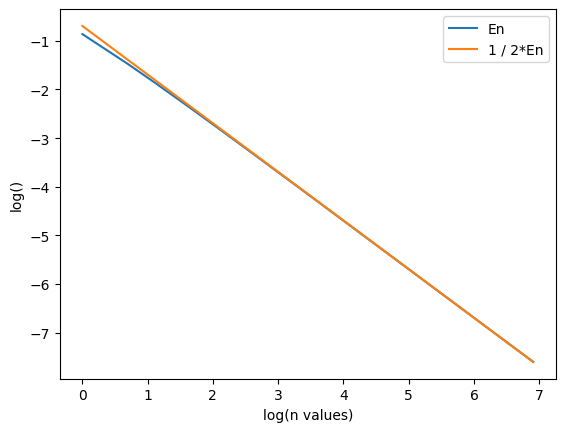

In [15]:
importlib.reload(task3);
n_max = 1000

# Use linspace to create array of n vals using start, stop, # points
n_vals = np.linspace(1, n_max, n_max)

# Take absolute value of our fn to set up En_vals
En_vals = np.abs(task3.gamma_error_1(n_max))

# Plot with resepective labels/legend and log of both x/y coordinates
fig, ax = plt.subplots()
ax.plot(np.log(n_vals), np.log(En_vals), label = "En")
ax.plot(np.log(n_vals), np.log(0.5 * n_vals ** -1), label = "1 / 2*En")
ax.set_xlabel("log(n values)")
ax.set_ylabel("log()")
ax.legend()

---
#### 🚩 3.b [2 marks]

If everything is working correctly, you should notice the plots of $E_n$ and $\frac{1}{2n}$ are almost right on top of each other, and getting closer for large $n$. But since they are not exactly the same, it means there is a next-order error that we aren't seeing yet.

Write a function called `gamma_error_2(n_max)` which computes 

$$
E_{2,n} \ =  \ H_{n} - \log(n) - \gamma - \frac{1}{2n}
$$

for $1 \le n \le n_{\max}$. Your function should return a NumPy vector with length $n_{\max}$ containing the values of $E_{2, n}$.

Then, in the code cell below, use your function to create a log-log plot of $|E_{2, n}|$ versus $n$ for $1 \le n \le 1000$, again also with a plot of $\frac{1}{2n}$ on the same axes.

You should observe that the plot of $\frac{1}{2n}$ no longer aligns with the error $|E_{2, n}|$. In fact, for sufficiently large $n$, we now have $E_{2, n} \sim \frac{1}{12n^2}$; confirm this visually, by adding a plot of $\frac{1}{12n^2}$ on the same axes.

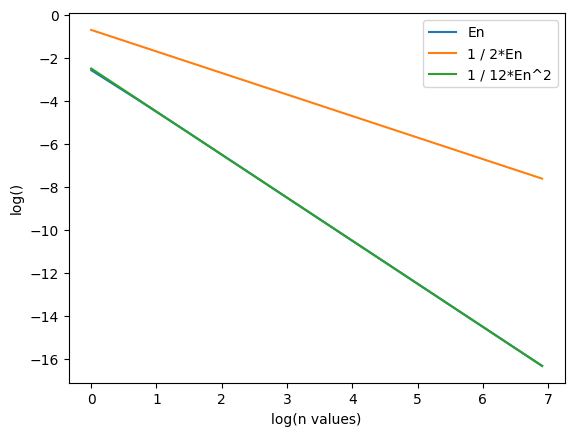

In [16]:
importlib.reload(task3);
n_max = 1000

# Use linspace to create array of n vals using start, stop, # points
n_vals2 = np.linspace(1, n_max, n_max)

# Take absolute value of our fn to set up En_vals
En2_vals = np.abs(task3.gamma_error_2(n_max))

# Plot with resepective labels/legend and log of both x/y coordinates
fig, ax = plt.subplots()
ax.plot(np.log(n_vals2), np.log(En2_vals), label = "En")
ax.plot(np.log(n_vals2), np.log(0.5 * n_vals2 ** -1), label = "1 / 2*En")
ax.plot(np.log(n_vals2), np.log((1 / 12) * n_vals2 ** -2), label = "1 / 12*En^2")
ax.set_xlabel("log(n values)")
ax.set_ylabel("log()")
ax.legend()

---
### Bernoulli numbers 

You might wonder where the $1/(2n)$ and $1/(12 n^{2})$ come from. It happens that there is a pattern that keeps going as far as we want to take it. That is, for any $k$,

$$\large
H_{n} - \log(n) \ \sim \ \gamma - \sum_{j = 1}^{k} \frac{B_{j}}{j\,n^{j}} \qquad \text{as} \qquad n \to \infty
$$

The $B_{j}$ coefficients are the famous ***Bernoulli numbers***! The first few are:
$$
B_{0}=1, \quad B_{1} \ = \ -\frac{1}{2}, \quad B_{2} \ = \ \frac{1}{6}, \quad B_{3} \ = \ 0, \quad B_{4} \ = \ -\frac{1}{30}, \quad B_{5} \ = \ 0, \quad B_{6} \ = \ \frac{1}{42}, \quad B_{7} \ = \ 0
$$
$$
B_{8} \ = \ -\frac{1}{30}, \quad B_{9} \ = \ 0, \quad B_{10} \ = \ \frac{5}{66}, \quad B_{11} \ = \ 0, \quad B_{12} \ = \ -\frac{691}{2730}, \quad B_{13} \ = \ 0\quad B_{14} \ = \ \frac{7}{6}.
$$

You'll notice that other than $B_{1}$, all the odd terms are zero. You'll also notice the signs alternate. Otherwise, any patterns are difficult to spot. 

An important historical note is that these numbers were the subject of the world's first automatic computer program. The story is that Ada Lovelace (who happened to also be "the mad, bad and dangerous" Lord Byron's estranged daughter) created the program that ran on Charles Babbage's "Analytical Engine", which comprised a contraption of mechanical gears and levers -- all back in the 1830s! 

These days, you can use `scipy` to generate the Bernoulli numbers:

In [17]:
from scipy.special import bernoulli

# gives all the numbers from 0 to 14 (inclusive)
bernoulli(14)

array([ 1.        , -0.5       ,  0.16666667,  0.        , -0.03333333,
        0.        ,  0.02380952,  0.        , -0.03333333,  0.        ,
        0.07575758,  0.        , -0.25311355,  0.        ,  1.16666667])

---
#### 🚩 3.c [3 marks]

Write a function called `gamma_error(k, n_max)` that takes two input arguments, an integer `k` and an integer `n_max`, and computes the $k$th order error,

$$
E_{k,n} \ = \ H_{n} - \log(n) - \gamma + \sum_{j = 1}^{k} \frac{B_{j}}{j\,n^{j}},
$$

for $1 \le n \le n_\max$. Your function should return a NumPy vector with length $n_{\max}$ containing the values of $E_{k, n}$.

Then, in the code cell below, use your function to create a log-log plot of $|E_{k, n}|$ versus $n$ for $1 \le n \le 1000$, for the values of $1 \le k \le 14$ for which $B_k \neq 0$.

Discuss and interpret your observations using the Markdown cell below, in no more than 150 words. For instance, what do you think is an efficient way to compute an approximation of $\gamma$ accurate to within $10^{-7}$?

/Users/sara/A1/a1-sarahuston7/task3.py:59: RuntimeWarning: divide by zero encountered in divide
  B.append(np.sum((bernoulli(k)[1:]) / (k_vals * (n ** k_vals))))
/Users/sara/A1/a1-sarahuston7/task3.py:59: RuntimeWarning: invalid value encountered in divide
  B.append(np.sum((bernoulli(k)[1:]) / (k_vals * (n ** k_vals))))


Text(0, 0.5, 'log(En)')

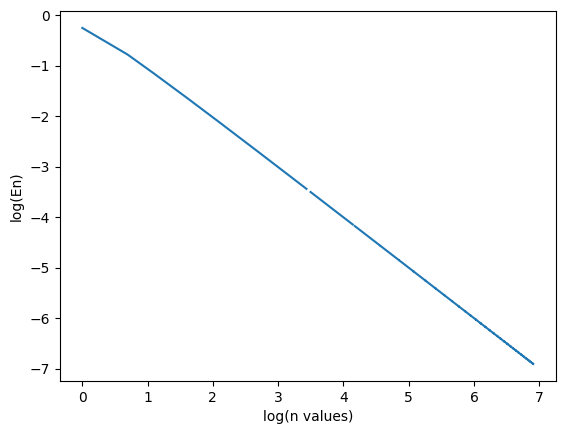

In [18]:
importlib.reload(task3);
n_max = 1000

# Use linspace to create array of n vals using start, stop, # points
n_vals3 = np.linspace(1, 1000, 1000)
k_val = 14

# Take absolute value of our fn to set up En_vals
En2_vals = np.abs(task3.gamma_error(k_val, n_max))

# Plot with resepective labels/legend and log of both x/y coordinates
fig, ax = plt.subplots()
ax.plot(np.log(n_vals3), np.log(En2_vals), label = "En")
ax.set_xlabel("log(n values)")
ax.set_ylabel("log(En)")

The findings show that as n logarithmically increases, error logarithmically decreases. This means as you take more measurements, the accuracy of approximations increase. This has interesting applications. Depending on what error range you want, you could find a sweet spot of less measurements, but still a low amount of error. One way to compute an approximation of gamma accurate within 10^-7 would be to use 10^7 measurements, as visualized on the graph. However, if measurments are costly, a more efficient way to compute gamma would be to use linear regression. If we space out measurements and use general trends, we could hypothetically combine equations and data to approximate gamma more effectively. This could entail precise placement of measurements to enhance accuracy and deminish demand for measurements.